In [1]:
#https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b


from hyperas.distributions import choice, uniform
from hyperas import optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from hyperopt import Trials, STATUS_OK, tpe

Using TensorFlow backend.


In [2]:
def data():
    df = pd.read_csv('../sample/sample_0.011.csv')
    df.drop(['block', 'lot', 'assesstot'], axis=1, inplace=True)
    
    categorical_vars = ['cd', 'schooldist', 'council', 'zipcode', 'firecomp',
           'policeprct', 'healtharea', 'sanitboro', 'sanitsub', 'zonedist1',
           'spdist1', 'ltdheight', 'landuse',  'ext', 'proxcode', 'irrlotcode', 'lottype',
           'borocode','edesignum', 'sanitdistrict', 'healthcenterdistrict', 'pfirm15_flag']
    
    df_dummies = pd.get_dummies(df[categorical_vars], drop_first=False)  
    df.drop(categorical_vars, axis=1, inplace=True)
    df = pd.concat([df, df_dummies], axis=1)
    
    X = df[df.columns]
    X.drop('assessland', axis=1, inplace=True)
    print('predictors', len(X.columns))
    X = X.values
    Y = df['assessland'].values
    
    scaler = MinMaxScaler()
    x_norm = scaler.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(x_norm, Y.reshape(-1,1), 
                                                        test_size=0.2, random_state=0)
    return X_train, X_test, Y_train, Y_test


In [3]:
from keras import backend

def model(X_train, Y_train, X_test, Y_test):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(412))
    model.add(tf.keras.layers.Activation('linear'))
    model.add(tf.keras.layers.Dropout({{uniform(0, 1)}}))
    model.add(tf.keras.layers.Dense({{choice(range(1,200,10))}}))
    model.add(tf.keras.layers.Activation({{choice(['relu', 'linear'])}}))
    model.add(tf.keras.layers.Dropout({{uniform(0, 1)}}))
    model.add(tf.keras.layers.Dense({{choice(range(1,200,10))}}))
    model.add(tf.keras.layers.Activation({{choice(['relu', 'linear'])}}))
    model.add(tf.keras.layers.Dropout({{uniform(0, 1)}}))
    model.add(tf.keras.layers.Dense(1))
    model.add(tf.keras.layers.Activation('linear'))  
    model.compile(loss='mse', metrics=['mse'], optimizer={{choice(['rmsprop', 'adam'])}})
    model.fit(X_train, Y_train,batch_size={{choice([20,50,100,150])}},epochs=10,verbose=2, 
              validation_data=(X_test, Y_test))
    pred = model.evaluate(X_test, Y_test, verbose=0)
    return {'loss': -pred[1], 'status': STATUS_OK, 'model': model}


In [4]:
X_train, X_test, Y_train, Y_test = data()

predictors 412


input_nodes 412
max_hidden_nodes 274


In [5]:
best_run, best_model = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=5,
                                      trials=Trials(),
                                      notebook_name='test_nn')

>>> Imports:
#coding=utf-8

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.preprocessing import MinMaxScaler
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras import backend
except:
    pass

try:
    from keras.utils import plot_model
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'Dropout': hp.uniform('Dropout', 0, 1),
        'Dense': hp.choice('Dense', range(1,200,10)),
        'Activation': hp.choice('Activation', ['relu', 'linear']),
        'Dropout_1': hp.uniform('Dropout_1', 0, 1),
        'Dense_1': hp

 - 1s - loss: 4779905014.0972 - mean_squared_error: 4779905024.0000 - val_loss: 3435842280.7439 - val_mean_squared_error: 3435842048.0000

Epoch 8/10                                                             
 - 1s - loss: 4757749857.8191 - mean_squared_error: 4757749248.0000 - val_loss: 3432443643.7426 - val_mean_squared_error: 3432443392.0000

Epoch 9/10                                                             
 - 1s - loss: 4781843392.1854 - mean_squared_error: 4781843456.0000 - val_loss: 3433161799.0631 - val_mean_squared_error: 3433161984.0000

Epoch 10/10                                                            
 - 1s - loss: 4760859195.6640 - mean_squared_error: 4760859136.0000 - val_loss: 3429887320.3604 - val_mean_squared_error: 3429887488.0000

Train on 12428 samples, validate on 3108 samples                       
Epoch 1/10                                                             
 - 1s - loss: 5136457644.3746 - mean_squared_error: 5136457728.0000 - val_loss: 3802

In [7]:

print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print(best_run)

Evalutation of best performing model:
3108/3108 [==============================] - 0s 36us/sample - loss: 3429887392.1544 - mean_squared_error: 3429887488.0000
[3429887392.15444, 3429887500.0]
{'Activation': 1, 'Activation_1': 1, 'Dense': 14, 'Dense_1': 19, 'Dropout': 0.9770005173795487, 'Dropout_1': 0.8366666847115819, 'Dropout_2': 0.9128294469805703, 'batch_size': 2, 'optimizer': 0}


In [8]:
activation = ['relu', 'linear']
best = best_run.copy()
best['Activation'] = activation[best['Activation']]
best['Activation_1'] = activation[best['Activation_1']]
#best['Activation_2'] = activation[best['Activation_2']]
optimizers = ['rmsprop', 'adam']
best['optimizer'] = optimizers[best['optimizer']]
print(best)

{'Activation': 'linear', 'Activation_1': 'linear', 'Dense': 14, 'Dense_1': 19, 'Dropout': 0.9770005173795487, 'Dropout_1': 0.8366666847115819, 'Dropout_2': 0.9128294469805703, 'batch_size': 2, 'optimizer': 'rmsprop'}


In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(412))
model.add(tf.keras.layers.Activation('linear'))
model.add(tf.keras.layers.Dropout(0.977))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('linear'))
model.add(tf.keras.layers.Dropout(0.837))
model.add(tf.keras.layers.Dense(19))
model.add(tf.keras.layers.Activation('linear'))
model.add(tf.keras.layers.Dropout(0.912))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))  
model.compile(loss='mse', metrics=['mse'], optimizer='rmsprop')

In [13]:
history_train = model.fit(X_train, Y_train,epochs=5,verbose=2, validation_data=(X_test, Y_test))

Train on 12428 samples, validate on 3108 samples
Epoch 1/5
 - 1s - loss: 5144920909.4664 - mean_squared_error: 5144919552.0000 - val_loss: 3847636333.2201 - val_mean_squared_error: 3847636224.0000
Epoch 2/5
 - 1s - loss: 5129091856.1493 - mean_squared_error: 5129090048.0000 - val_loss: 3801414548.9936 - val_mean_squared_error: 3801415168.0000
Epoch 3/5
 - 1s - loss: 5060545103.2224 - mean_squared_error: 5060544000.0000 - val_loss: 3702747818.2548 - val_mean_squared_error: 3702747136.0000
Epoch 4/5
 - 1s - loss: 5013068829.4561 - mean_squared_error: 5013069824.0000 - val_loss: 3656759553.4903 - val_mean_squared_error: 3656759296.0000
Epoch 5/5
 - 1s - loss: 5011191603.7232 - mean_squared_error: 5011194368.0000 - val_loss: 3645893573.7761 - val_mean_squared_error: 3645894400.0000


ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [14]:
history_train.history

{'loss': [5144920909.466366,
  5129091856.149341,
  5060545103.222401,
  5013068829.456067,
  5011191603.723206],
 'mean_squared_error': [5144919600.0,
  5129090000.0,
  5060544000.0,
  5013070000.0,
  5011194400.0],
 'val_loss': [3847636333.220077,
  3801414548.993565,
  3702747818.254826,
  3656759553.4903474,
  3645893573.776062],
 'val_mean_squared_error': [3847636200.0,
  3801415200.0,
  3702747100.0,
  3656759300.0,
  3645894400.0]}

In [15]:
plt.plot(history_train.history['rmse_metric'])
plt.plot(history_train.history['val_rmse_metric'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_nn_assesstot.png')
plt.show()

print(np.mean(history_train.history['rmse_metric']))
print(np.mean(history_train.history['val_rmse_metric']))


KeyError: 'rmse_metric'

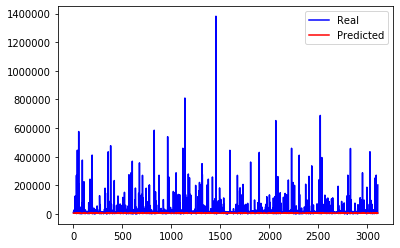

In [16]:
#plot y predict vs actual y for test set
y_pred = model.predict(X_test)
fig, ax = plt.subplots()
ax.plot(Y_test, color = 'blue')
ax.plot(y_pred, color = 'red')
ax.legend(['Real', 'Predicted'])
fig.savefig('real_vs_pred_nn_assesstot.png')
plt.show()

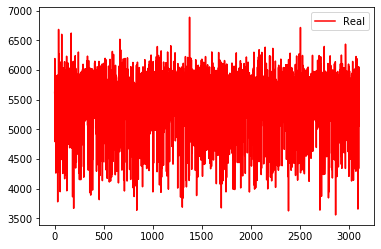

In [17]:
#plot y predict vs actual y for test set
y_pred = model.predict(X_test)
fig, ax = plt.subplots()
ax.plot(y_pred, color = 'red')
ax.legend(['Real', 'Predicted'])
fig.savefig('real_vs_pred_nn_assesstot.png')
plt.show()

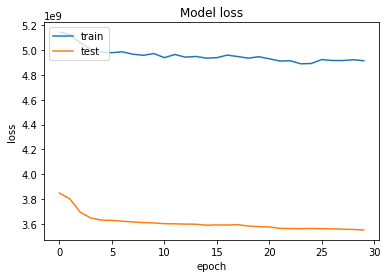

In [77]:
plt.plot(history_train.history['loss'])
plt.plot(history_train.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_nn_assesstot.png')
plt.show()